In [1]:
import cv2
import numpy as np

In [3]:
# ex)1
image_rectangle = np.ones((400,400), dtype = 'uint8')
cv2.rectangle(image_rectangle, (50,50), (300,300), (255,255,255), -1)
cv2.imshow("image show", image_rectangle)
cv2.waitKey(0)

-1

In [4]:
# ex)2
image_circle = np.ones((400,400), dtype = 'uint8')
cv2.circle(image_circle, (300,300), 70, (255,255,255), -1)
cv2.imshow("image show", image_circle)
cv2.waitKey(0)

-1

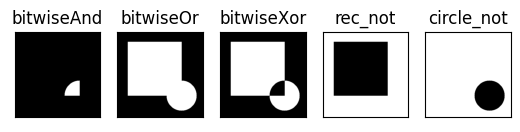

In [6]:
# ex)3
import matplotlib.pyplot as plt

bitwiseAnd = cv2.bitwise_and(image_rectangle, image_circle)
# cv2.imshow("image bitwiseAnd", bitwiseAnd)
cv2.waitKey(0)

bitwiseOr = cv2.bitwise_or(image_rectangle, image_circle)
# cv2.imshow("image bitwiseOr", bitwiseOr)
cv2.waitKey(0)

bitwiseXor = cv2.bitwise_xor(image_rectangle, image_circle)
# cv2.imshow("Xor", bitwiseXor)
cv2.waitKey(0)

rec_not = cv2.bitwise_not(image_rectangle)
# cv2.imshow("rectangle not ", rec_not)
cv2.waitKey(0)


circle_not = cv2.bitwise_not(image_circle)
# cv2.imshow("circle not ", circle_not)
cv2.waitKey(0)

titles = ['bitwiseAnd', 'bitwiseOr', 'bitwiseXor','rec_not', 'circle_not']
images = [bitwiseAnd, bitwiseOr, bitwiseXor, rec_not, circle_not]

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [7]:
# ex)4 마스킹 과제는 흰색대신 이미지를 넣어주시면 됩니다. (원하는 이미지 혹은 얼굴이미지)
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

img = cv2.imread('face_picture.png') # 이미지 불러오기

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray scale로 변환

faces = face_cascade.detectMultiScale(gray, 1.1, 4) # 좌표탐지

img_faces = []
for (x, y, w, h) in faces:
    img_faces.append(img[y:(y+h), x:(x+w)]) # 리스트에 각 얼굴 이미지 넣기
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 3)
# cv2.imshow('show', img)
# cv2.waitKey(0)

mask = np.zeros((683, 1024, 3), dtype='uint8')
cv2.rectangle(mask, (60, 50), (280, 280), (255, 255, 255), -1)
cv2.rectangle(mask, (420, 50), (550, 230), (255, 255, 255), -1)
cv2.rectangle(mask, (750, 50), (920, 280), (255, 255, 255), -1)
# cv2.imshow("...", mask)
# cv2.waitKey(0)

x_offset = [60, 420, 750] # mask 내 상자 위치 = mask 내 얼굴 이미지의 위치
y_offset = [50, 50, 50] # resize 하기 전이라서 사진과 mask 내 상자 크기와 일치하지 않는다.

x_end = [280, 550, 920]
y_end = [280, 230, 280]

resize_img_faces = []
for i in range(len(img_faces)):
    resize_img_faces.append(cv2.resize(img_faces[i], (x_end[i]-x_offset[i], y_end[i] - y_offset[i]))) # 얼굴 이미지 mask 내 상자 크기에 맞게 resize
    mask[y_offset[i]:y_end[i], x_offset[i]:x_end[i]] = resize_img_faces[i]
cv2.imshow("final", mask)
cv2.waitKey(0)

-1